In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
os.chdir('preprocessing/data_cleaning')
from data_cleaning import DataCleaning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_cleaner = DataCleaning(path="C:/Users/Admin/Documents/ML project/ml-project/data/train_airbnb_berlin.csv")
data_cleaner.data_cleaning(csv_name="train_airbnb_berlin_cleaned.csv")
df = data_cleaner.df

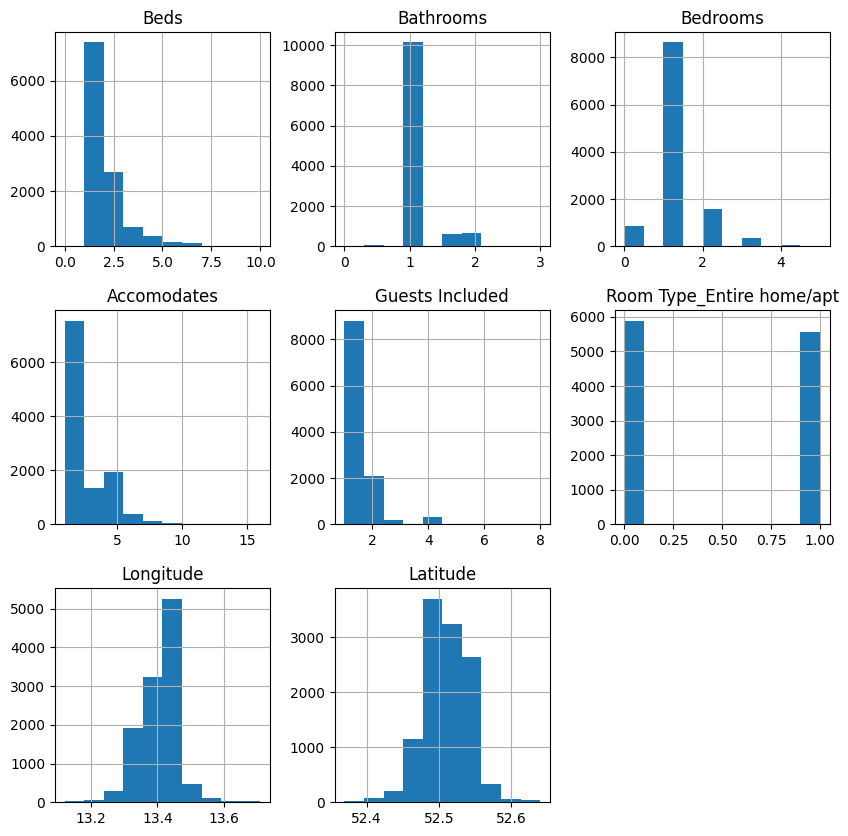

In [2]:
train,test = train_test_split(df,random_state=0)
F = ['Beds','Bathrooms','Bedrooms','Accomodates','Guests Included','Room Type_Entire home/apt']
L = F+['Longitude','Latitude']
X_train = train[L]
X_test = test[L]
X_train.hist(figsize=(10,10))
plt.show()

In [3]:
reg = LinearRegression().fit(X_train,train['Price'])

In [5]:
def dist(arr):
    

array([ -0.46765284,  23.05553492,   9.84949376,   8.24711844,
         6.17330755,  24.63362678, -15.31723548,  38.04921123])

Mean error :  21.747655840754323  euros
Relative mean error :  40.75423937264277 %
Quantile 1 :  -9.700000000000003  euros
Quantile 3 :  16.65  euros


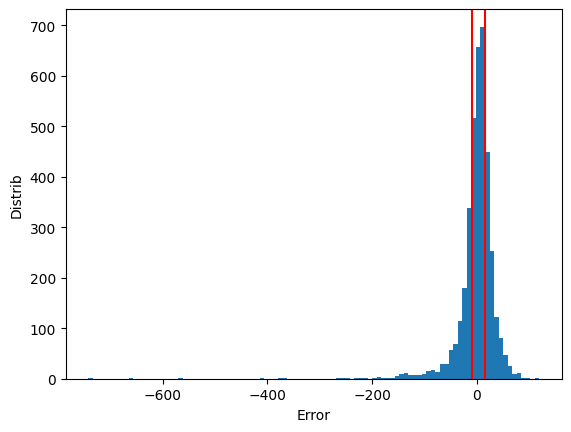

In [4]:
model = KNeighborsRegressor()
model.fit(X_train,train['Price'])


model = KNeighborsRegressor(20,weights='uniform')
model.fit(X_train,train['Price'])
test['error'] = model.predict(X_test)-test['Price']
train['error'] = model.predict(X_train)-train['Price']
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q[0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()